In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r'C:\Users\subra\OneDrive\Desktop\netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Checking for missing values

In [3]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### There are missing values in column director,cast,country and date_added.
We can't randomly fill the missing values in columns of director and cast, so we can drop them.


For minimal number of missing values in country and date_added,rating, we can fill them using mode(most common value) and mean.

### Handling missing values

In [4]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['country'].mode()[0])
df = df.dropna( how='any',subset=['cast', 'director'])
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

### Cleaning the data

### adding these columns
listed_in - Genre

Year Added - year_add

Month Added - month_add

Princial Country - country_main

In [5]:
#Rename the 'listed_in' column as 'Genre' for easy understanding
df = df.rename(columns={"listed_in":"Genre"})
df['Genre'] = df['Genre'].apply(lambda x: x.split(",")[0])
df['Genre'].head()

2              Crime TV Shows
5                   TV Dramas
6    Children & Family Movies
7                      Dramas
8            British TV Shows
Name: Genre, dtype: object

In [6]:
df['year_add'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_add'].head()

2    2021
5    2021
6    2021
7    2021
8    2021
Name: year_add, dtype: object

In [7]:
df['month_add'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_add'].head()

2    September
5    September
6    September
7    September
8    September
Name: month_add, dtype: object

In [8]:
df['country_main'] = df['country'].apply(lambda x: x.split(",")[0])
df['country_main'].head()

2     United States
5     United States
6     United States
7     United States
8    United Kingdom
Name: country_main, dtype: object

In [9]:
df['type'].value_counts()

Movie      5522
TV Show     178
Name: type, dtype: int64

In [10]:
df['rating'].value_counts()

TV-MA            1939
TV-14            1329
R                 789
PG-13             477
TV-PG             456
PG                279
TV-Y7             123
TV-Y              102
TV-G               96
NR                 58
G                  40
TV-Y7-FV            3
UR                  3
NC-17               2
74 min              1
84 min              1
66 min              1
United States       1
Name: rating, dtype: int64

## Making two new dataframes, one with movies collection and other with TV shows collection:

movie_df

tv_df

In [11]:
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

In [12]:
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,year_add,month_add,country_main
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September,United States
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",2021,September,United States
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,Comedies,A woman adjusting to life after a loss contend...,2021,September,United States
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,Dramas,After most of her family is murdered in a terr...,2021,September,Germany
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",United States,"September 22, 2021",2021,TV-PG,91 min,Children & Family Movies,When the clever but socially-awkward Tetê join...,2021,September,United States


 ## Exploratory Data Analysis

 ### Number of Movies vs TV Shows

<AxesSubplot:xlabel='type', ylabel='count'>

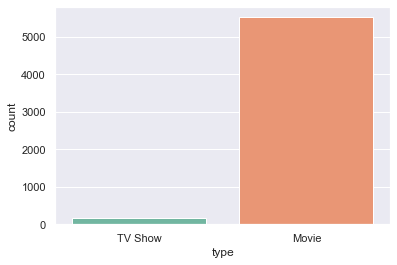

In [13]:
sb.set(style="darkgrid")
sb.countplot(x="type", data= df, palette="Set2")

#### more Movies on Netflix than TV shows wohoo...

### Movies & TV Shows Ratings analysis

<AxesSubplot:xlabel='rating', ylabel='count'>

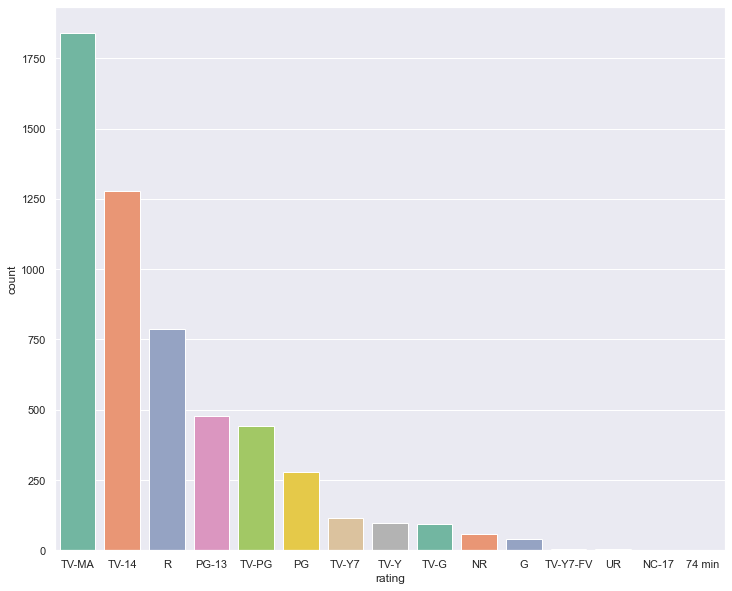

In [14]:
#MOVIES RATINGS
plt.figure(figsize=(12,10))
sb.set(style="darkgrid")
sb.countplot(x="rating", data= movie_df, palette="Set2", order=movie_df['rating'].value_counts().index[0:15])

### Results:-
The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17.

<AxesSubplot:xlabel='rating', ylabel='count'>

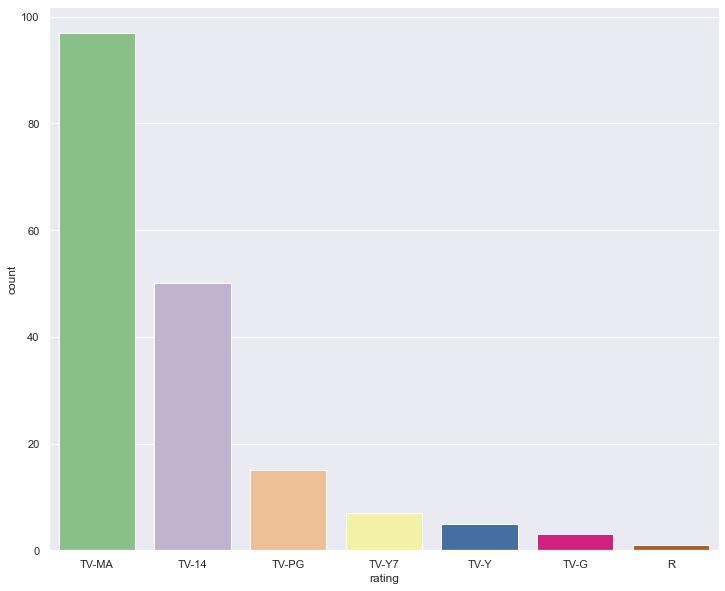

In [15]:
plt.figure(figsize=(12,10))
sb.set(style="darkgrid")
sb.countplot(x="rating", data=tv_df, palette="Accent", order=tv_df['rating'].value_counts().index[0:15])

### Inference:-
Most of the TV Shows has 'TV-14' ratings which stands for the content can be inappropriate for children under 14 years of age.

Second highest count of ratings in TV Shows is 'TV-MA', for which the content is for matured audience only.

TV Shows has least amount of counts with 'R' ratings.

### Yearly Analysis of content

<AxesSubplot:xlabel='count', ylabel='release_year'>

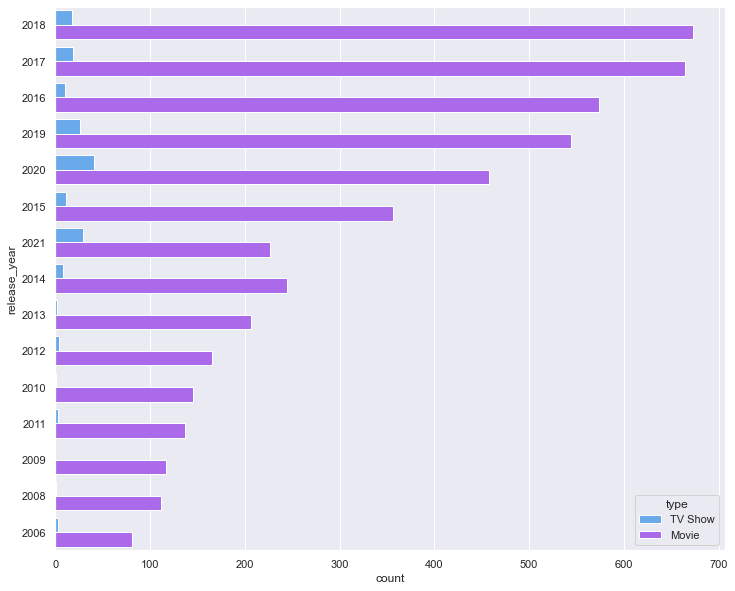

In [16]:
plt.figure(figsize=(12,10))
sb.set(style="darkgrid")
sb.countplot(y="release_year", data= df, palette="cool", order= df['release_year'].value_counts().index[0:15],hue=df['type'])

### Inference
We can see that Netflix released most number of content in year 2017.
Noticeable growth in releasing content can be seen from the year 2015.

### Analysis of movies duration

In [17]:
movie_df['duration']=movie_df['duration'].str.replace(' min','')
movie_df['duration']=movie_df['duration'].astype(str).astype(float)
movie_df['duration']

6        91.0
7       125.0
9       104.0
12      127.0
13       91.0
        ...  
8801     96.0
8802    158.0
8804     88.0
8805     88.0
8806    111.0
Name: duration, Length: 5522, dtype: float64

<AxesSubplot:xlabel='duration', ylabel='Density'>

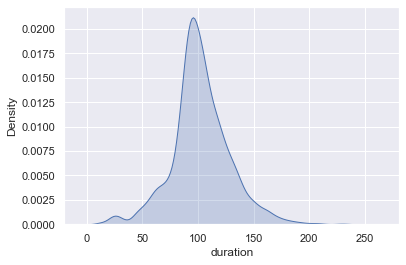

In [18]:
sb.set(style="darkgrid")
sb.kdeplot(data=movie_df['duration'], shade=True)

#### So, a good amount of movies on Netflix are among the duration of 75-120 mins.

### Trends of movies duration

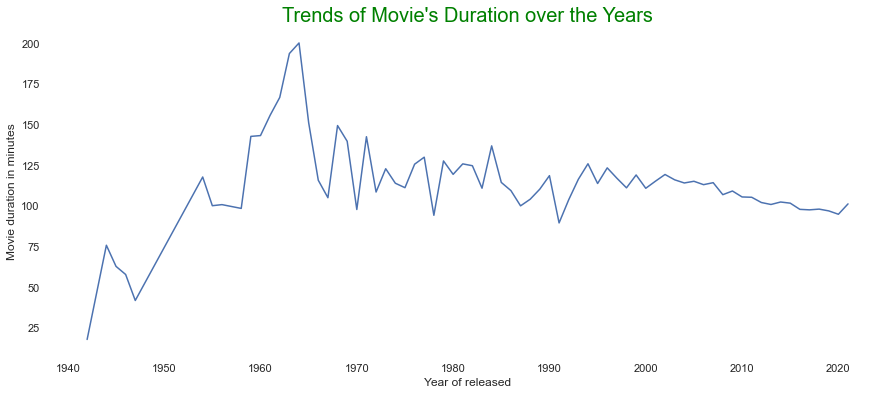

In [19]:
duration_year = movie_df.groupby(['release_year']).mean()
duration_year = duration_year.sort_index()

plt.figure(figsize=(15,6))
sb.lineplot(x=duration_year.index, y=duration_year.duration.values)
plt.box(on=None)
plt.ylabel('Movie duration in minutes');
plt.xlabel('Year of released');
plt.title("Trends of Movie's Duration over the Years", fontsize=20, color='Green');

### Inference 
In the years of 1960 to 1965, Movies durations were over 200 minutes, after 1965 the durations became comparitively shorter.

From the year 1980, we can see consistent trend of movie durations, of which duration time is around in between 100-150 minutes.

### Analysis of TV Shows with most number of seasons

In [20]:
tv_df['duration']=tv_df['duration'].str.replace(' Season','')
tv_df['duration']=tv_df['duration'].str.replace('s','')
tv_df['duration']=tv_df['duration'].astype(str).astype(int)
tv_df['duration']

2       1
5       1
8       9
11      1
47      1
       ..
8172    1
8214    1
8293    1
8302    1
8599    3
Name: duration, Length: 178, dtype: int32

 ### Extract TV Shows titles and its number of seasons:

In [21]:
#Extract the columns from tv_df
columns=['title','duration']
tv_shows = tv_df[columns]

In [22]:
#sort the dataframe by number of seasons
tv_shows = tv_shows.sort_values(by='duration',ascending=False)
tv_shows
top20 = tv_shows[0:20]
top20

,title,duration
2423,Supernatural,15
3541,Naruto,9
8,The Great British Baking Show,9
1998,Call the Midwife,9
2947,Arrow,8
7896,Royal Pains,8
380,The Flash,7
3653,Comedians in Cars Getting Coffee,6
1173,Men on a Mission,6
6742,Father Brown,6


<AxesSubplot:xlabel='title'>

<Figure size 720x432 with 0 Axes>

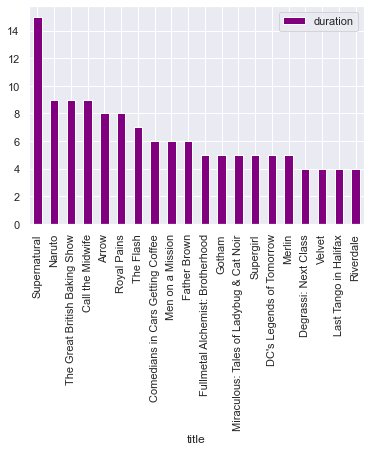

In [23]:
plt.figure(figsize=(10,6))
top20.plot(kind='bar',x='title',y='duration', color='purple')

#### Supernatural , Naruto has the highest numbers of seasons

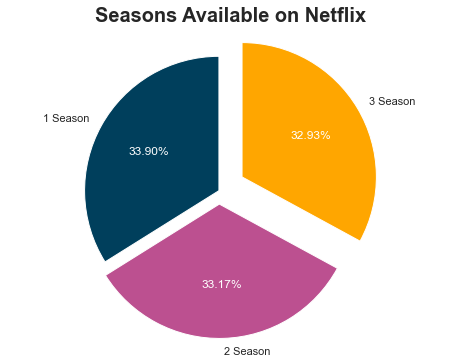

In [24]:
# TV SHOWS AND THEIR SEASONS
plt.figure(figsize=(8, 6))
labels=['1 Season', '2 Season', '3 Season']
_, _, texts = plt.pie(df.duration.value_counts()[:3], labels=labels, autopct='%1.2f%%', startangle=90, 
                      explode=(0.0, 0.1, 0.2), colors=['#003f5c', '#bc5090', '#ffa600'])
plt.axis('equal')
plt.title('Seasons Available on Netflix', fontsize=20, fontweight='bold');
for text in texts:
    text.set_color('white')

#### From the chart we can analyze, 35.04% TV Shows has only 1 Season,32.48% TV Shows has 2 seasons and 32.48% Tv Shows has 3 seasons available

### Countries on top for movies content creation

<AxesSubplot:xlabel='country_main', ylabel='count'>

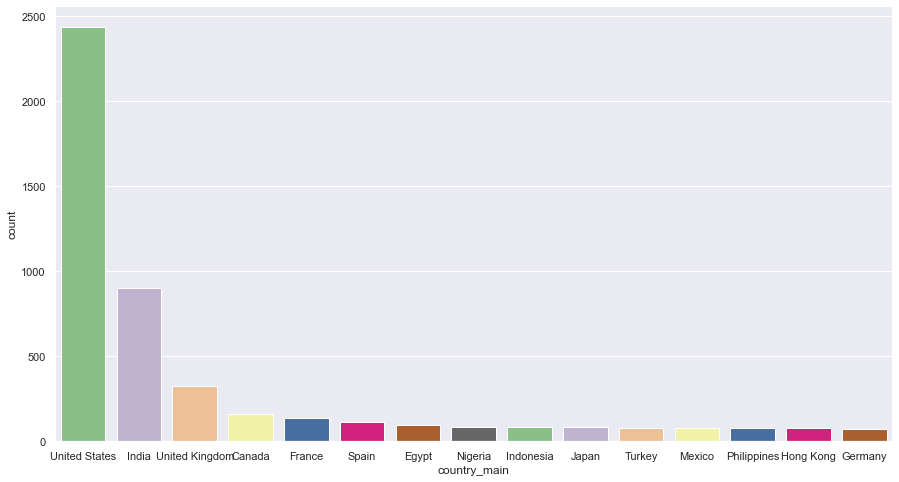

In [25]:
plt.figure(figsize=(15,8))
sb.set(style="darkgrid")
sb.countplot(x="country_main", data=movie_df, palette="Accent", order=movie_df['country_main'].value_counts().index[0:15])

#### United States creates highest amount of movies followed by India and UK.

### Countries on top for TV Show content creation

<AxesSubplot:xlabel='country_main', ylabel='count'>

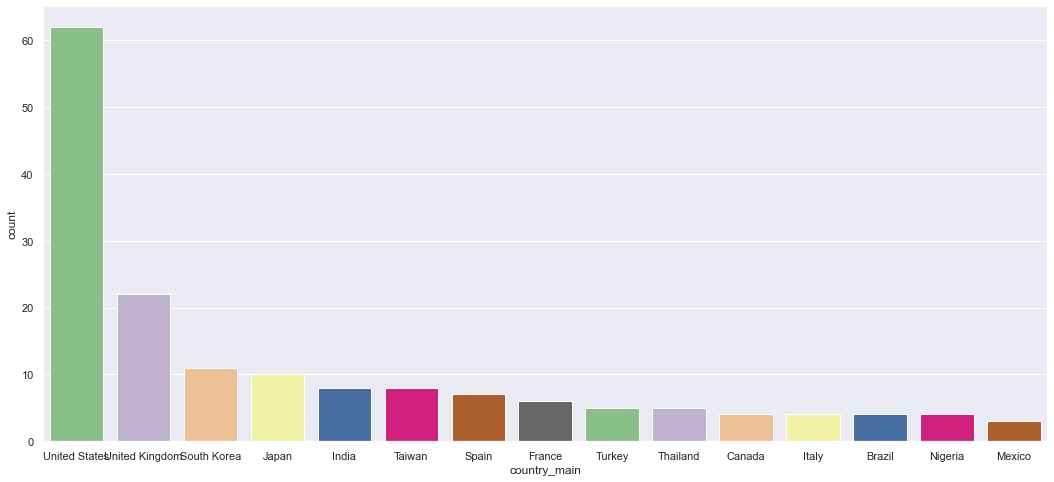

In [26]:
plt.figure(figsize=(18,8))
sb.set(style="darkgrid")
sb.countplot(x="country_main", data=tv_df, palette="Accent", order=tv_df['country_main'].value_counts().index[0:15])

#### United States,United Kingdom,South Korea,Japan creates most of the amount of TV Shows on netflix.

### Understanding what content is available in different countries

In [27]:
# Different Genres from Countries
columns=['Genre','country_main']
gen_country = df[columns]
gen_country.head()

,Genre,country_main
2,Crime TV Shows,United States
5,TV Dramas,United States
6,Children & Family Movies,United States
7,Dramas,United States
8,British TV Shows,United Kingdom


 ### Contents released by years

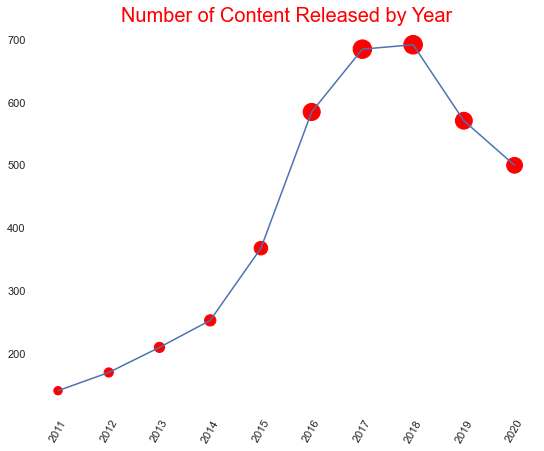

In [28]:
release = df['release_year'].value_counts()
release = release.sort_index(ascending=True)

plt.figure(figsize=(9,7))
plt.plot(release[-11:-1])
plt.scatter(release[-11:-1].index, release[-11:-1].values, s=0.5*release[-11:-1].values, c='Red');
plt.box(on=None);
plt.xticks(rotation = 60)
plt.xticks(release[-11:-1].index);
plt.title('Number of Content Released by Year', color='red', fontsize=20);

### Directors with most number of Movies produced

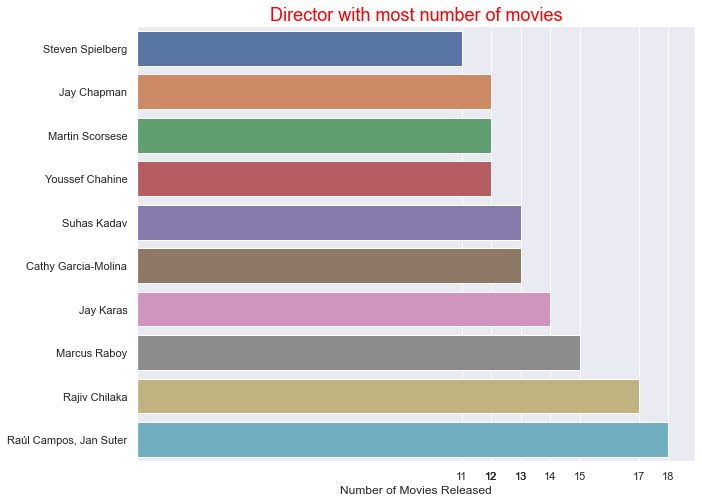

In [29]:
plt.figure(figsize=(10,8))
sb.barplot(y= movie_df.director.value_counts()[:10].sort_values().index, x=movie_df.director.value_counts()[:10].sort_values().values);
plt.title('Director with most number of movies', color='red', fontsize=18)
plt.xticks(movie_df.director.value_counts()[:10].sort_values().values);
plt.xlabel('Number of Movies Released');

### Director with most number of TV Shows

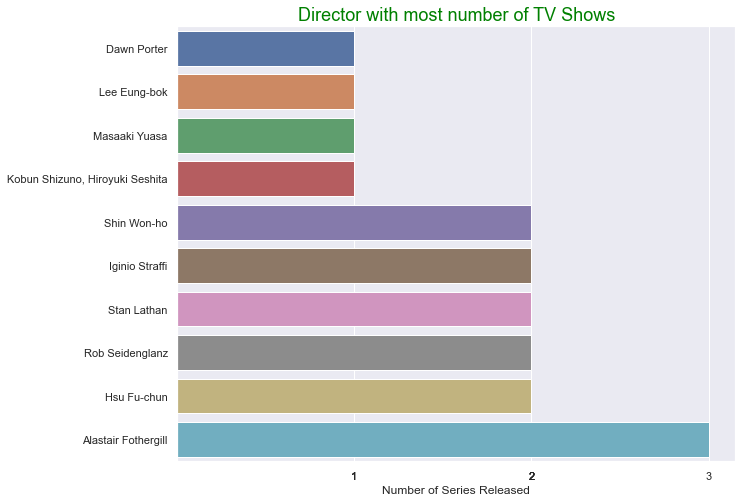

In [30]:
plt.figure(figsize=(10,8))
sb.barplot(y= tv_df.director.value_counts()[:10].sort_values().index, x=tv_df.director.value_counts()[:10].sort_values().values);
plt.title('Director with most number of TV Shows', color='green', fontsize=18)
plt.xticks(tv_df.director.value_counts()[:10].sort_values().values);
plt.xlabel('Number of Series Released');

 ### Most Popular Genre on Netflix

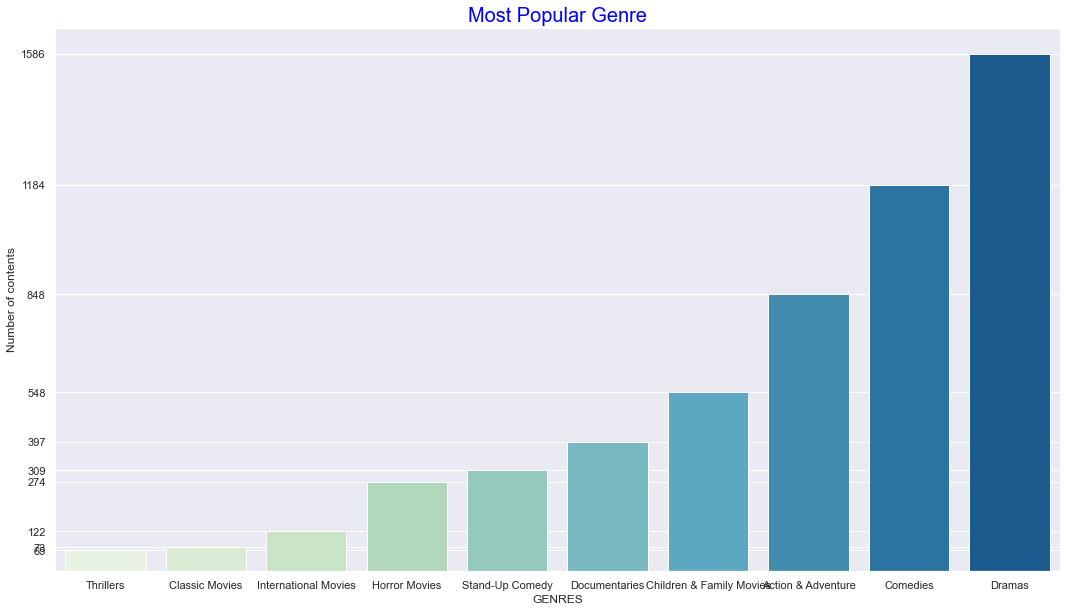

In [31]:
plt.figure(figsize=(18,10))
sb.barplot(x= df.Genre.value_counts()[:10].sort_values().index, y=df.Genre.value_counts()[:10].sort_values().values,palette='GnBu');
plt.title('Most Popular Genre', color='Blue', fontsize=20)
plt.yticks(df.Genre.value_counts()[:10].sort_values().values);
plt.xlabel('GENRES');
plt.ylabel('Number of contents');

#### Dramas everywhere

### Top Actor/Actresses on Netflix

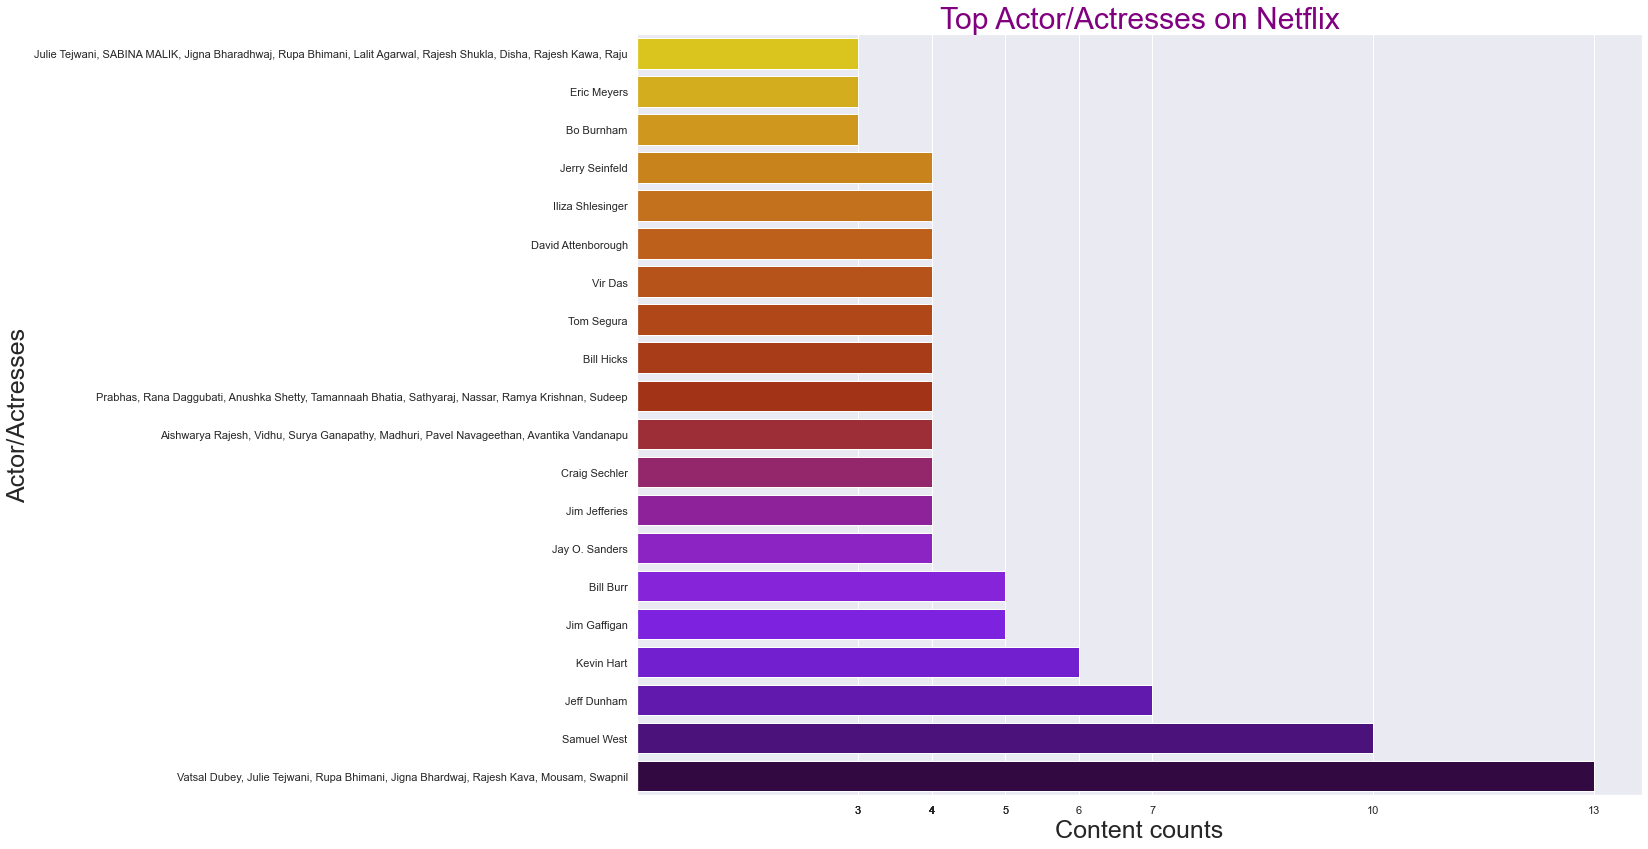

In [32]:
plt.figure(figsize=(18,14))
sb.barplot(y= df.cast.value_counts()[:20].sort_values().index, x=df.cast.value_counts()[:20].sort_values().values,palette='gnuplot_r');
plt.title('Top Actor/Actresses on Netflix', color='purple', fontsize=30)
plt.xticks(df.cast.value_counts()[:20].sort_values().values);
plt.ylabel('Actor/Actresses', fontsize=25);
plt.xlabel('Content counts', fontsize=25);

#### Actor 'Samuel West' has highest number of movies/Tv shows on Netflix.

### Netflix Recommendation System

#### Plot description based Recommendation System

##### We calculate similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score.

In [33]:
df['description'].head()

2    To protect his family from a powerful drug lor...
5    The arrival of a charismatic young priest brin...
6    Equestria's divided. But a bright-eyed hero be...
7    On a photo shoot in Ghana, an American model s...
8    A talented batch of amateur bakers face off in...
Name: description, dtype: object

#### Overview
We need to convert the word vector of each overview.We'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each description.The overall importance of each word to the documents in which they appear is equal to TF * IDF.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

In [35]:
#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(5700, 14767)

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. 

Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.




In [36]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [37]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

Let's define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies.

In [38]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [39]:
get_recommendations('#realityhigh')

823                 Then Came You
8752                     Wish Man
8661              Unfinished Song
1608               3 Days to Kill
8473                The Rainmaker
7516                   Mr. Church
1567            The Panti Sisters
3661                        Bogda
6045    A Mission in an Old Movie
4019         Everything About Her
Name: title, dtype: object

In [40]:
get_recommendations('PK')

8438                            The New Romantic
5979                            1 Chance 2 Dance
4574                             Judge Singh LLB
5184                               Akulah Balqis
4920                                        Dude
5190                             The Bittersweet
447     The Twilight Saga: Breaking Dawn: Part 1
1318         To All The Boys: Always And Forever
3021                                  Steve Jobs
2445                                      Chippa
Name: title, dtype: object

This is completely plot based recommendations. we can see these are not so accurate, so we can try to add more metrics to improve model performance.

### Multiple metrics(Genre,cast,director) based Recommendation System

From the Genre,cast and director features, we need to extract the three most important actors, the director and genres associated with that movie.

In [41]:
features=['Genre','director','cast','description','title']
filters = df[features]

In [42]:
#Cleaning the data by making all the words in lower case.
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [43]:
for feature in features:
    filters[feature] = filters[feature].apply(clean_data)
    
filters.head()

,Genre,director,cast,description,title
2,crimetvshows,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","toprotecthisfamilyfromapowerfuldruglord,skille...",ganglands
5,tvdramas,mikeflanagan,"katesiegel,zachgilford,hamishlinklater,henryth...",thearrivalofacharismaticyoungpriestbringsglori...,midnightmass
6,children&familymovies,"robertcullen,joséluisucha","vanessahudgens,kimikoglenn,jamesmarsden,sofiac...",equestria'sdivided.butabright-eyedherobelieves...,mylittlepony:anewgeneration
7,dramas,hailegerima,"kofighanaba,oyafunmikeogunlano,alexandraduah,n...","onaphotoshootinghana,anamericanmodelslipsbacki...",sankofa
8,britishtvshows,andydevonshire,"melgiedroyc,sueperkins,maryberry,paulhollywood",atalentedbatchofamateurbakersfaceoffina10-week...,thegreatbritishbakingshow


We can now create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer.

In [44]:
def create_soup(x):
    return x['director'] + ' ' + x['cast'] + ' ' +x['Genre']+' '+ x['description']

In [45]:
filters['soup'] = filters.apply(create_soup, axis=1)

used countvectorizer instead of TF-IDF

In [46]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filters['soup'])

In [47]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
filters.head()

,Genre,director,cast,description,title,soup
2,crimetvshows,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","toprotecthisfamilyfromapowerfuldruglord,skille...",ganglands,"julienleclercq samibouajila,tracygotoas,samuel..."
5,tvdramas,mikeflanagan,"katesiegel,zachgilford,hamishlinklater,henryth...",thearrivalofacharismaticyoungpriestbringsglori...,midnightmass,"mikeflanagan katesiegel,zachgilford,hamishlink..."
6,children&familymovies,"robertcullen,joséluisucha","vanessahudgens,kimikoglenn,jamesmarsden,sofiac...",equestria'sdivided.butabright-eyedherobelieves...,mylittlepony:anewgeneration,"robertcullen,joséluisucha vanessahudgens,kimik..."
7,dramas,hailegerima,"kofighanaba,oyafunmikeogunlano,alexandraduah,n...","onaphotoshootinghana,anamericanmodelslipsbacki...",sankofa,"hailegerima kofighanaba,oyafunmikeogunlano,ale..."
8,britishtvshows,andydevonshire,"melgiedroyc,sueperkins,maryberry,paulhollywood",atalentedbatchofamateurbakersfaceoffina10-week...,thegreatbritishbakingshow,"andydevonshire melgiedroyc,sueperkins,maryberr..."


In [48]:
# Reset index of our main DataFrame and construct reverse mapping as before
filters=filters.reset_index()
indices = pd.Series(filters.index, index=filters['title'])

In [49]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [50]:
get_recommendations_new('PK', cosine_sim2)

1114                           3 Idiots
8391       The Legend of Michael Mishra
3915                     Mumbai Matinee
4790                  Anthony Kaun Hai?
1115                 Ferrari Ki Sawaari
1423                       BluffMaster!
195     EMI: Liya Hai To Chukana Padega
1022                   Taare Zameen Par
2720                            Dostana
3334                              Drive
Name: title, dtype: object

In [51]:
get_recommendations_new('5Gang', cosine_sim2)

1491                   AK vs AK
3214                     Payday
163          My Boss's Daughter
2280        Mumbai Delhi Mumbai
3788                 Chopsticks
6439            Chal Dhar Pakad
78               Tughlaq Durbar
79      Tughlaq Durbar (Telugu)
694                       Aziza
2074                    Soldier
Name: title, dtype: object

In [53]:
get_recommendations_new('El Camino Christmas', cosine_sim2)

1461                          Mystic Pizza
8226                          The Break-Up
6692                 Employee of the Month
8406                         The Love Guru
7202                     Kill the Irishman
7442                          Men in Black
1703    Jingle Jangle: A Christmas Journey
6379                     Brooklyn's Finest
7734                           Phantom Boy
337                        Good Luck Chuck
Name: title, dtype: object